---
# 4. 군집분석 심화
---
## 4.1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import cluster

In [2]:
pd.read_csv('../data/academy.csv', encoding='cp949')

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90
5,6,90,92,90,96,100
6,7,65,70,66,76,70
7,8,60,90,70,98,80
8,9,46,56,43,55,60
9,10,88,67,90,70,70


## 4.2. 전처리
### 4.2.1. 열 명칭 바꾸기/ 열 제거

In [3]:
academy=pd.read_csv('../data/academy.csv', encoding='cp949')
academy.columns=['num','kor','math','eng','science','intention']
academy=academy.drop('num',axis=1)
academy

,kor,math,eng,science,intention
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90
5,90,92,90,96,100
6,65,70,66,76,70
7,60,90,70,98,80
8,46,56,43,55,60
9,88,67,90,70,70


### 4.2.2. 모형 확인

In [4]:
print(type(academy))
academy.shape

<class 'pandas.core.frame.DataFrame'>


(52, 5)

### 4.2.3. 자료형 변환 (데이터 프래임>>> 넘파이)

In [5]:
academy_arr=np.array(academy)

In [6]:
academy.columns, academy_arr, academy_arr.shape

(Index(['kor', 'math', 'eng', 'science', 'intention'], dtype='object'),
 array([[ 90,  75,  85,  60,  70],
        [ 65,  90,  60,  88,  80],
        [ 45,  53,  48,  50,  60],
        [ 77,  96,  62,  92,  70],
        [ 88,  89,  80,  82,  90],
        [ 90,  92,  90,  96, 100],
        [ 65,  70,  66,  76,  70],
        [ 60,  90,  70,  98,  80],
        [ 46,  56,  43,  55,  60],
        [ 88,  67,  90,  70,  70],
        [ 70,  93,  77,  89,  60],
        [ 99,  80,  95,  70,  80],
        [ 97,  67,  80,  60,  80],
        [ 50,  40,  30,  54,  50],
        [ 90,  77,  92,  60,  70],
        [ 55,  88,  67,  92,  60],
        [ 77,  90,  70,  98,  70],
        [ 90,  89,  80,  92,  90],
        [ 76,  90,  80,  92,  70],
        [ 70,  92,  80,  95,  70],
        [ 76,  75,  70,  82,  80],
        [ 77,  92,  68,  89,  80],
        [ 60,  50,  70,  40,  60],
        [ 54,  70,  56,  72,  60],
        [ 72,  88,  67,  95,  80],
        [ 58,  76,  59,  80,  70],
        [ 88,  60,

## 4.3. 모델 학습

In [7]:
model=cluster.KMeans(n_clusters=5)#5개 군집으로 분류
model.fit(academy_arr)

KMeans(n_clusters=5)

In [8]:
model.labels_

array([0, 3, 2, 3, 4, 4, 1, 3, 2, 0, 3, 4, 0, 2, 0, 1, 3, 4, 3, 3, 3, 3,
       2, 1, 3, 1, 0, 4, 1, 0, 3, 4, 0, 0, 2, 1, 3, 4, 4, 1, 0, 4, 0, 1,
       2, 3, 0, 1, 4, 0, 2, 3])

In [9]:
labels=model.labels_

In [10]:
academy_arr[labels==0]

array([[90, 75, 85, 60, 70],
       [88, 67, 90, 70, 70],
       [97, 67, 80, 60, 80],
       [90, 77, 92, 60, 70],
       [88, 60, 76, 58, 60],
       [76, 54, 70, 58, 70],
       [71, 48, 69, 50, 80],
       [90, 77, 82, 65, 80],
       [88, 57, 78, 60, 80],
       [91, 67, 89, 70, 60],
       [92, 70, 88, 60, 80],
       [69, 55, 70, 54, 60]], dtype=int64)

In [11]:
ldata=academy_arr[labels==0]
print(ldata)
print()
print(ldata[:,2])
print(ldata[:,3])

[[90 75 85 60 70]
 [88 67 90 70 70]
 [97 67 80 60 80]
 [90 77 92 60 70]
 [88 60 76 58 60]
 [76 54 70 58 70]
 [71 48 69 50 80]
 [90 77 82 65 80]
 [88 57 78 60 80]
 [91 67 89 70 60]
 [92 70 88 60 80]
 [69 55 70 54 60]]

[85 90 80 92 76 70 69 82 78 89 88 70]
[60 70 60 60 58 58 50 65 60 70 60 54]


## 4.4. 시각화 - 그래프 그리기
### 4.4.1. Scatter-plot

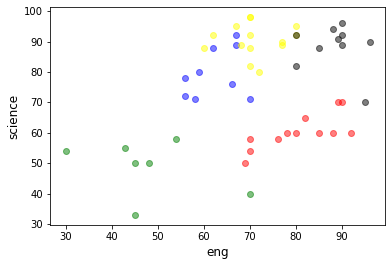

In [12]:
ldata = academy_arr[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3], c='red', alpha=0.5, marker="o")

ldata = academy_arr[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3], c='blue', alpha=0.5, marker="o")

ldata = academy_arr[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3], c='green', alpha=0.5, marker="o")

ldata = academy_arr[labels == 3]
plt.scatter(ldata[:, 2], ldata[:, 3], c='yellow', alpha=0.5, marker="o")

ldata = academy_arr[labels == 4]
plt.scatter(ldata[:, 2], ldata[:, 3], c='black', alpha=0.5, marker="o")

# 축라벨 설정
plt.xlabel(academy.columns[2], fontsize="large")
plt.ylabel(academy.columns[3], fontsize="large")
plt.show()

### 4.4.2. 덴드로그램

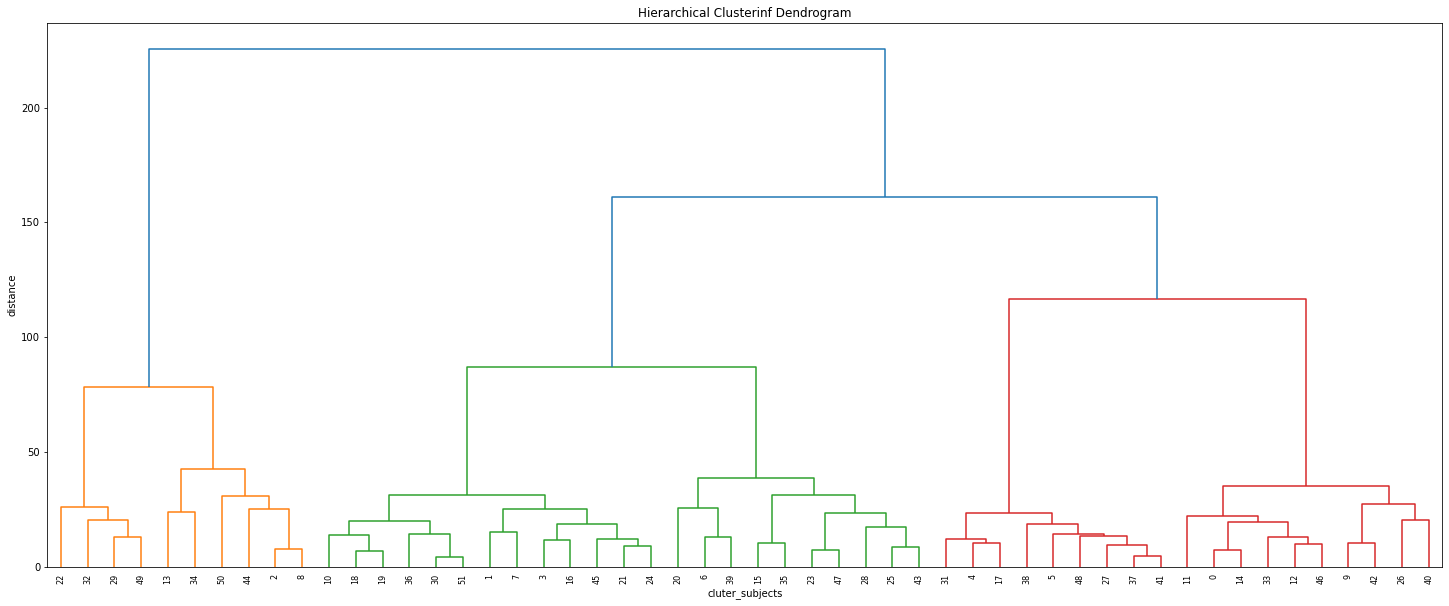

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

z=linkage(academy_arr, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clusterinf Dendrogram')
plt.xlabel('cluter_subjects')
plt.ylabel('distance')

dendrogram(z,
           leaf_rotation=90, #rotaion the x axis labels(각도조절)
           leaf_font_size=8)
plt.show()